<a href="https://colab.research.google.com/github/rgalazrojas/visualizar/blob/main/IBM_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import yfinance as yf
import  requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

Pregunta 1

In [9]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")
print(tesla_data.head())


                                 Open        High         Low       Close  \
Date                                                                        
2024-04-15 00:00:00-04:00  170.240005  170.690002  161.380005  161.479996   
2024-04-16 00:00:00-04:00  156.740005  158.190002  153.750000  157.110001   
2024-04-17 00:00:00-04:00  157.639999  158.330002  153.779999  155.449997   
2024-04-18 00:00:00-04:00  151.250000  152.199997  148.699997  149.929993   
2024-04-19 00:00:00-04:00  148.970001  150.940002  146.220001  147.050003   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-04-15 00:00:00-04:00  100245300        0.0           0.0  
2024-04-16 00:00:00-04:00   97000000        0.0           0.0  
2024-04-17 00:00:00-04:00   82439700        0.0           0.0  
2024-04-18 00:00:00-04:00   96098800        0.0           0.0  
2024-04-19 00:00:00-04:00   86005100        0.0           0.0  


Pregunta 2

In [63]:

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table

rows = revenue_table.find_all("tr")
dates = []
revenues = []

for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            dates.append(date)
            revenues.append(float(revenue))

tesla_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue (Millions USD)": revenues
})

print(tesla_revenue.tail())


          Date  Revenue (Millions USD)
57  2010-09-30                    31.0
58  2010-06-30                    28.0
59  2010-03-31                    21.0
60  2009-09-30                    46.0
61  2009-06-30                    27.0


Pregunta 3

In [45]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date   Open   High    Low  Close   Volume  Dividends  \
0 2024-04-15 00:00:00-04:00  10.81  10.84  10.06  10.06  5086300        0.0   
1 2024-04-16 00:00:00-04:00  10.00  10.55   9.95  10.37  4162100        0.0   
2 2024-04-17 00:00:00-04:00  10.44  10.59  10.30  10.30  2096700        0.0   
3 2024-04-18 00:00:00-04:00  10.32  10.63  10.27  10.31  2175400        0.0   
4 2024-04-19 00:00:00-04:00  10.20  10.50  10.20  10.42  2455100        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


Pregunta 4

In [51]:
url1 = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url1, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        revenue_table = table
        break

rows = revenue_table.find_all("tr")
data = []
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

gme_revenue = pd.DataFrame(data, columns=["Fecha", "Ingresos"])
print(gme_revenue.tail())

         Fecha Ingresos
60  2010-01-31   $3,524
61  2009-10-31   $1,835
62  2009-07-31   $1,739
63  2009-04-30   $1,981
64  2009-01-31   $3,492


Pregunta 5

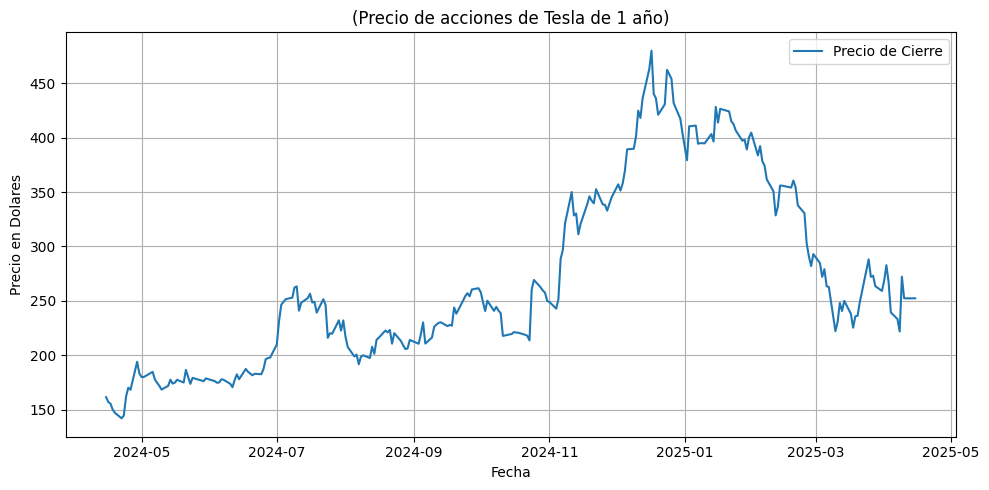

In [62]:
def make_graph(data, title="Gráfico de acciones"):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label="Precio de Cierre")
    plt.title(title)
    plt.xlabel("Fecha")
    plt.ylabel("Precio en Dolares")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")
tesla_data.reset_index(inplace=True)

make_graph(tesla_data, title="(Precio de acciones de Tesla de 1 año)")


Pregunta 6

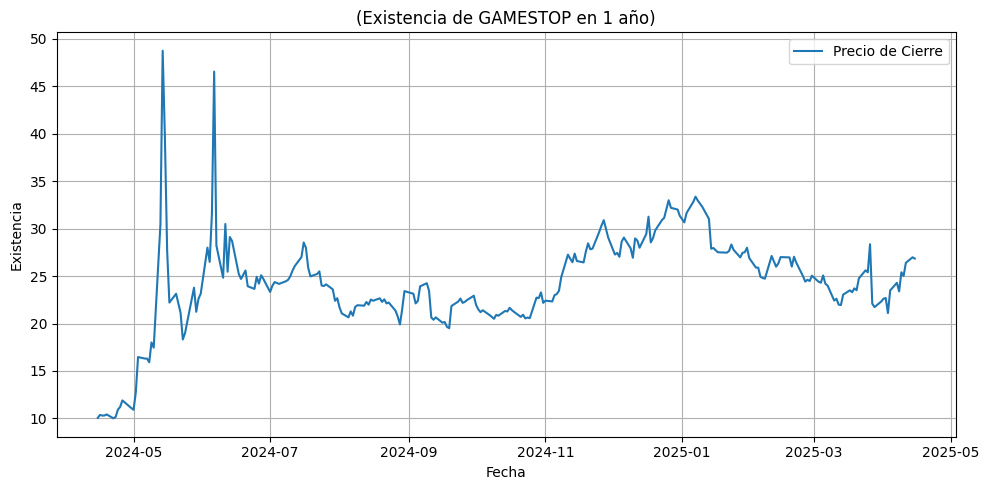

In [61]:
def make_graph(data, title="Gráfico de acciones"):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Close'], label="Precio de Cierre")
    plt.title(title)
    plt.xlabel("Fecha")
    plt.ylabel("Existencia")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")
gme_data.reset_index(inplace=True)

make_graph(gme_data, title="(Existencia de GAMESTOP en 1 año)")